# Learning Discrete-Time Estimation and Control with Transformers

In [3]:
import numpy as np
import torch
torch.set_default_tensor_type(torch.DoubleTensor)
rng = np.random.default_rng()

from kalman_filter import *
from helpers import *
from plotting import *
from trajectories import *

CUT = 5 # cutoff the first few datapoints because they have too much noise so it is not a fair comparison.
T = 250 # how long to simulate the trajectory # 100
num_traj_train = 100; num_traj_test = 20
num_traj = num_traj_train + num_traj_test

# State Estimation: Continuous State Space 

Dynamical System:

$\vec{x}_{t+1} = A\vec{x}_t + B \vec{u}_t + \vec{w}_t$ is the Transition Model, where $\vec{w}_t \sim \mathcal{N}(\vec{0}, Q)$ is process noise

$\vec{y}_t = C\vec{x}_t + \vec{v}_t$ is Observation Model, where $\vec{v}_t \sim \mathcal{N}(\vec{0}, R)$ is sensor noise

## Generate Trajectories

In [4]:
task_name = 'smd' # Choose from 'so2', 'motion', 'so3', 'accel', 'smd'
A, B, C, Q, R, x0, state_dim, input_dim, obs_dim = sys_params[task_name]

u_seq = 0.05 * (rng.random(size=(num_traj, T, input_dim))*2 - 1)
traj, meas = generate_traj(num_traj, T, A, B, C, Q, R, x0, u_seq, state_dim, input_dim, obs_dim)
# traj  has shape=(num_traj, T, state_dim)
# meas  has shape=(num_traj, T, obs_dim)
# u_seq has shape=(num_traj, T, input_dim)

Trajectory shape (250, 2)
Measured shape (250, 1)


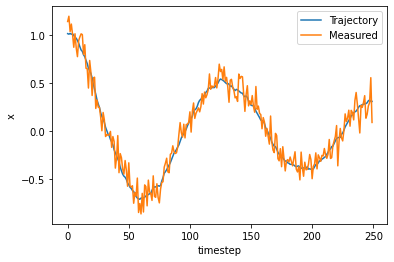

In [5]:
# plot a sample trajectory and noisy measurements
plot({'Trajectory': traj[0], 'Measured': meas[0]})

## 0. Optimization Based Approach using known A, B, C to get best possible fit

This is the baseline for BERT

In [41]:
err_opt = 0
ls_rec = np.zeros(shape=(num_traj, T, state_dim))

for i in range(num_traj):
    print("Solving problem", i)
    ls_rec[i] = optimal_traj(A, B, C, Q, R, meas[i], x0, u_seq[i])

err_opt += np.linalg.norm(ls_rec - traj)**2 / T / num_traj
    
print("Average Squared Error", err_opt)

Solving problem 0
Solving problem 1
Solving problem 2
Solving problem 3
Solving problem 4
Solving problem 5
Solving problem 6
Solving problem 7
Solving problem 8
Solving problem 9
Solving problem 10
Solving problem 11
Solving problem 12
Solving problem 13
Solving problem 14
Solving problem 15
Solving problem 16
Solving problem 17
Solving problem 18
Solving problem 19
Solving problem 20
Solving problem 21
Solving problem 22
Solving problem 23
Solving problem 24
Solving problem 25
Solving problem 26
Solving problem 27
Solving problem 28
Solving problem 29
Solving problem 30
Solving problem 31
Solving problem 32
Solving problem 33
Solving problem 34
Solving problem 35
Solving problem 36
Solving problem 37
Solving problem 38
Solving problem 39
Solving problem 40
Solving problem 41
Solving problem 42
Solving problem 43
Solving problem 44
Solving problem 45
Solving problem 46
Solving problem 47
Solving problem 48
Solving problem 49
Solving problem 50
Solving problem 51
Solving problem 52
Sol

## 1. Kalman Filtering using known A, B, C to estimate $\mathbb{E}[X_t | y_1, y_2, ... y_n]$

### 1a. Recalculating gains at each timestep until convergence

In [42]:
kfiltered = np.zeros(shape=(num_traj, T, state_dim))

for i in range(num_traj):
    kinematics_forward = KFilter(A, B, C, Q, R, state=x0)
    kfiltered[i] = kinematics_forward.simulate(meas[i], u_seq[i])
    
err_fltr = np.linalg.norm(kfiltered - traj)**2 / num_traj / T
    
print("Average Squared Error:", err_fltr)

Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
Converged in 77 iterations
C

Trajectory shape (250, 2)
Measured shape (250, 1)
Filtered shape (250, 2)


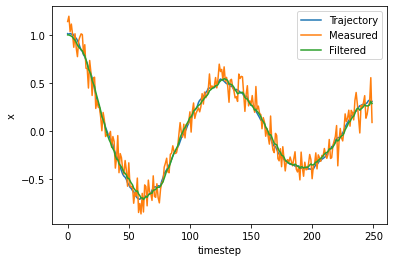

In [43]:
plot({'Trajectory': traj[0], 'Measured': meas[0], 'Filtered': kfiltered[0]})

### 1b. Kalman Filter with pure steady state gains

In [44]:
kfiltered_ss = np.zeros(shape=(num_traj, T, state_dim))

for i in range(num_traj):
    kinematics_forward = KFilter(A, B, C, Q, R, state=x0)
    kinematics_forward.run_till_ss()
    kfiltered_ss[i] = kinematics_forward.simulate(meas[i], u_seq[i])
    
err_fltr_ss = np.linalg.norm(kfiltered_ss - traj)**2 / num_traj / T

print("Average Squared Error", err_fltr_ss)

Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in

Trajectory shape (250, 2)
Measured shape (250, 1)
Filtered shape (250, 2)


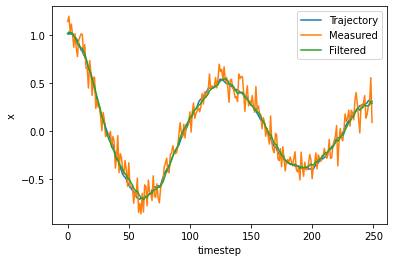

In [45]:
plot({'Trajectory': traj[0], 'Measured': meas[0], 'Filtered': kfiltered_ss[0]})

### 1c. Kalman Smoothing with Reverse Kalman Filter

In [33]:
err_kf_smoothed = 0

for i in range(num_traj):
    kinematics_forward = KFilter(A, B, C, Q, R, state=x0) # Forward KF
    fltr_fwd = kinematics_forward.simulate(meas[i], u_seq[i])
    
    kinematics_backward = KFilter(np.linalg.inv(A), -np.linalg.inv(A) @ B, C, Q, R, state=traj[i][-1]) # Backward KF
    fltr_bkwd = np.flip(kinematics_backward.simulate(np.flip(meas[i], axis=0), np.flip(u_seq[i], axis=0)), axis=0)
    
    # Kalman Smoothed (Avg forward and backward)
    smooth_states = (fltr_fwd + fltr_bkwd) / 2
    err_kf_smoothed += np.linalg.norm(smooth_states - traj[i])**2
    
print("Average Squared Error", err_kf_smoothed / num_traj / T)

Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
Converged in 80 iterations
Converged in 77 iterations
C

## 2. Least Squares System ID + Kalman Filtering

###  2a Update on the identified system at each timestep
The following cell takes about 40 seconds to run.

Note - The System Identification as implemented currently requires the state dimension to match the obs dimension. so2 and so3

In [ ]:
id_filtered = np.zeros(shape=(num_traj, T, state_dim))

for i in range(num_traj):
    # Use the same data as before, but now no peeking on what are the actual A, B matrices
    A_unk, B_unk = np.zeros(shape=(state_dim, state_dim)), np.zeros(shape=(state_dim, input_dim))
    kinematics = KFilter(A_unk, B_unk, C, Q, R, state=x0)
    id_fltr = np.zeros(shape=(T,state_dim))
    
    for t in range(T):
        A_found, B_found = system_id(meas[i], t, x0, u_seq[i])
        kinematics.A = A_found
        kinematics.B = B_found
        kinematics.predict(u_seq[i][t])
        kinematics.update(meas[i][t])
        id_fltr[t] = kinematics.state
    id_filtered[i] = id_fltr
    
err_id_fltr = np.linalg.norm(id_filtered[:, CUT:, :] - traj[:, CUT:, :])**2 / num_traj / T
print("Average Squared Error", err_id_fltr)

In [ ]:
plot({'Trajectory': traj[0], 'Measured': meas[0], 'Filtered': id_filtered[0]})

### 2b Kalman filter for each timestep simulated from the start

The cell below takes about 5 minutes to run.

In [ ]:
err_id_fltr_sim = 0
id_filtered_simulated = np.zeros(shape=(num_traj, T, state_dim))

for i in range(num_traj):
    id_fltr_sim = np.zeros(shape=(T,state_dim))
    for t in range(1, T):
        A_found, B_found = system_id(meas[i], t, x0, u_seq[i])
        kinematics = KFilter(A_found, B_found, C, Q, R, x0)
        id_fltr_sim[t] = kinematics.simulate(meas[i, :t], u_seq[i, :t])[-1]
    id_filtered_simulated[i] = id_fltr_sim
    
err_id_fltr_sim = np.linalg.norm(id_filtered_simulated[:, CUT:, :] - traj[:, CUT:, :])**2 / num_traj / T
print("Average Squared Error", err_id_fltr_sim)

In [ ]:
plot({"Trajectory:": traj[0], "ID + Filtered": id_filtered_simulated[0]})

## 3. Learning a Kalman Filter at each timestep: A and B are unknown

Nonlinear system ID of the Kalman Filter parameters:
$$\tilde{x}_{t+1} = A(I - KC)\tilde{x}_t + B u_t + AKy_t$$
$$\tilde{x}_{t+1} = A'\tilde{x}_t + B' u_t + G'y_t $$ 

where $A' = A(I - KC)$, $B' = B$, $G'= AK$

Observations
$$y_t = C' x_t$$ 

The following cell takes around 20 minutes per trajectory that you want to fit your KF on. In general, it is easiest to just train it on one.

Note that the learning the Kalman Filter can get roughly the same performance as the optimal Kalman Filter if trained for long enough. 

In [ ]:
err_learned_kf = 0
learned_kfs = []
learned_kfs_simulated = np.zeros(shape=(num_traj, T, state_dim))

if True:
    i = 0
# for i in range(num_traj_train, num_traj):
    kinematics = LearnedKFilter(state_dim, input_dim, obs_dim, x0)
    kinematics.fit(meas[i], u_seq[i], eps=2, maxIt=15000)
    learned_kf_sim = kinematics.simulate(meas[i], u_seq[i])
    learned_kfs_simulated[i] = learned_kf_sim
    learned_kfs.append(kinematics)

    plt.figure()
    plt.plot(kinematics.losses[30:])
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()

    err_learned_kf = np.linalg.norm(learned_kf_sim[CUT:, :] - traj[i,CUT:, :])**2

print("Average Squared Error", err_learned_kf / T) #num_traj_test / T)

Iteration 1000 : Loss 11.077436988571739
Iteration 2000 : Loss 7.006131074145723
Iteration 3000 : Loss 5.5341076661225905


In [ ]:
learned_kf_sim = kinematics.simulate(meas[i], u_seq[i])
learned_kfs_simulated[i] = learned_kf_sim
learned_kfs.append(kinematics)
plot({'Trajectory': traj[0], "Measured":meas[0], "Optimal KF": kfiltered[0], "Learned KF simulated": learned_kfs_simulated[0]})

In [ ]:
# The cell below is useful to compare the LearnedKF parameters to true parameters of the Kalman Filter
# learned_kf = learned_kfs[0]
# true_kf = KFilter(A, B, C, Q, R, state=x0)
# true_kf.run_till_ss()
# print("Aprime true is", A - A @ true_kf.K @ true_kf.C)
# print("Aprime learned is", learned_kf.Aprime)
# print("Bprime true is", B)
# print("Bprime learned is", learned_kf.Bprime)
# print("Gprime true is", A @ true_kf.K)
# print("Gprime learned is", learned_kf.Gprime)
# print("Cprime true is", C)
# print("Cprime learned is", learned_kf.Cprime)

## ZOH Baseline 
Quantify the error if we just predict the previous token (identity map) - ie. no learning involved

In [ ]:
error = 0
for i in range(num_traj):
    for t in range(1,T):
        error += np.linalg.norm(meas[i, t] - meas[i, t-1])**2
print("Error is", error / num_traj / T)

# Transformer-based techniques to learn the dynamics and filter the position

In [ ]:
from transformer import *
from transformer_attention import AttentionQKV
from transformer_attention import MultiHeadProjection
from transformer import PositionEmbedding

embed_dim = 36 # use 36-dimensional embedding for now
batch_size = 10

In [ ]:
# Training Data
indices_train = np.arange(num_traj_train)
np.random.shuffle(indices_train)

# The input to the model will be a concatenation of the current measured state and the "u" input at this timestep
target_sequences_train = torch.from_numpy(meas)[indices_train,:,:]
input_sequences_train = torch.from_numpy(u_seq)[indices_train,:,:]
transformer_input_train = torch.cat((target_sequences_train, input_sequences_train), dim=2)
true_positions_train = torch.from_numpy(traj)[indices_train,:,:]


# Test Data
indices_test = np.arange(num_traj_train, num_traj)
traj_test = traj[indices_test,:,:]
meas_test = meas[indices_test,:,:]
target_sequences_test = torch.from_numpy(meas)[indices_test,:,:]
input_sequences_test = torch.from_numpy(u_seq)[indices_test,:,:]
transformer_input_test = torch.cat((target_sequences_test, input_sequences_test), dim=2)
true_positions_test = torch.from_numpy(traj)[indices_test,:,:]

## GPT-style: Transformer Decoder only for Autoregressive generation

The following cell takes around 15 minutes to run.

In [ ]:
num_epochs = 200

gpt_model = TransformerDecoder(seq_input_size=(obs_dim+input_dim), embed_size=embed_dim, output_size=obs_dim,
                n_layers=3, n_heads=6, d_filter=256, dropout=None).to(device)
optimizer = torch.optim.Adam(gpt_model.parameters())

losses = []
loss_func = torch.nn.MSELoss(reduction='sum')

for i in range(num_epochs):
    for batchNum in range(num_traj_train // batch_size):
        
        transformer_input_batch = transformer_input_train[batchNum*batch_size:(batchNum+1)*batch_size, :, :]
        target_sequence_batch = target_sequences_train[batchNum*batch_size:(batchNum+1)*batch_size, :, :]  #TRYING TO HIT NOISY DATA
        
        decoder_output = gpt_model(transformer_input_batch, decoder_mask=None, mask_future=True, shift_target_sequence_right=True)
            
        loss = loss_func(decoder_output, target_sequence_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        curr_loss = loss.item()
        losses.append(curr_loss)
        
    print('Epoch', i, ": Loss", curr_loss)

In [ ]:
plt.figure()
plt.plot(losses[30:])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

In [ ]:
gpt_transformer_sim = gpt_model(transformer_input_test, decoder_mask=None, mask_future=True, shift_target_sequence_right=True)

# Index that we want to visualize from the test indices
i = 3 # index to visualize (0 through 19)

filtered = gpt_transformer_sim.detach().numpy()

plot({"Trajectory": traj_test[i], "Measured": meas_test[i], "Filtered by GPT":filtered[i], "Optimal KF":kfiltered[i + num_traj_train]})

print('Average Squared Error between traj and meas', np.linalg.norm(traj_test - meas_test)**2 / num_traj_test / T)
print('Average Squared Error of filtered vs traj', np.linalg.norm(filtered - traj_test)**2 / num_traj_test / T)
print('Average Squared Error between filtered and meas', np.linalg.norm(filtered - meas_test)**2 / num_traj_test / T)

## BERT-style: Transformer Encoder only, fill in trajectory

Note - we are taking advantage of the ground truth (TRUE TRAJECTORY) here! 
The following cell takes about 15 minutes to run.

In [ ]:
num_epochs = 200
# p = 0.15 # probability of zeroing out a token

bert_model = TransformerEncoder(seq_input_size=(obs_dim+input_dim), # size of the input tokens (obs_dim + input_dim)
                embed_size=embed_dim, output_size=state_dim, # trying to hit the actual state (not the observation)
                n_layers=4, n_heads=6, d_filter=64, 
                dropout=None)
optimizer = torch.optim.Adam(bert_model.parameters())

loss_func = torch.nn.MSELoss(reduction='sum')
# losses = []

for i in range(num_epochs):
    for batchNum in range(num_traj_train // batch_size):
        
        # Randomly zero-out p% of the tokens in transformer_input_train - different for each batch each time
        # If we're trying to hit the true targets, DO NOT MASK!
        # mask = torch.bernoulli( (1-p) * torch.ones(size=(batch_size, T) ) )
        # mask = mask.repeat(obs_dim+input_dim, 1, 1).permute(1, 2, 0)
        transformer_input_batch = transformer_input_train[batchNum*batch_size:(batchNum+1)*batch_size, :, :] # * mask
     
        # Do not even use the mask at all. Instead, just try to hit true targets. 
        # FIX THIS
        
        # transformer_input_batch has shape [batch_size, seq_len, (obs_dim+input_dim)] 
        
        true_positions_batch = true_positions_train[batchNum*batch_size:(batchNum+1)*batch_size, :, :]        
        encoder_output = bert_model(transformer_input_batch, encoder_mask=None)

        loss = loss_func(encoder_output, true_positions_batch) #,target_sequences_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        curr_loss = loss.item()
        losses.append(curr_loss)
        
    print('Epoch', i, ": Loss", curr_loss)

In [ ]:
plt.figure()
plt.plot(losses[30:])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

In [ ]:
bert_transformer_sim = bert_model(transformer_input_test, encoder_mask=None)

# Index that we want to visualize from the test indices
i = 0

filtered = bert_transformer_sim.detach().numpy()

plot({"Trajectory": traj_test[i], "Measured":meas_test[i], "Filtered":filtered[i], "Optimal KF":kfiltered[i + num_traj_train]})

print('Error between traj and meas', np.linalg.norm(traj_test - meas_test)**2 / num_traj_test / T)
print('Average Squared Error of BERT', np.linalg.norm(filtered - traj_test)**2 / num_traj_test / T)
print('Error between filtered and meas', np.linalg.norm(filtered - meas_test)**2 / num_traj_test / T)